# syn data

In [14]:
from ctgan import CTGAN
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv('Data for python.csv', sep=';', header=1, index_col=0, decimal=',')
df = df.fillna(0)
df = df.drop(columns=['Id'])
df = df.drop(columns=['ScandcleftID'])
df = df.drop(columns=['Født'])
df = df.drop(columns=['Materialedato A'])
df = df.drop(columns=['Materialedato B'])
df = df.drop(columns=['Materialedato C'])
df = df.drop(columns=['Total Row Score A'])
df = df.drop(columns=['Total Row Score B'])
df = df.drop(columns=['Total Row Score C'])
df = df.drop(columns=['Goslon Score A'])
df = df.drop(columns=['Goslon Score B'])
df = df.drop(columns=['Goslon Score C'])

In [16]:
A = df[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          "Crowding ",
          'Spacing',
          "Tooth shape/size\r\n",
          "Pan 2\r\n",
          ]]
B = df[['Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding .1',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',]]


In [17]:
ctgan = CTGAN(epochs=720,verbose=True,log_frequency=False)
ctgan.fit(df, df.columns)

syn = ctgan.sample(25000)
syn1 = ctgan.sample(124)



Gen. (-1.37) | Discrim. (-0.65): 100%|██████████| 720/720 [00:52<00:00, 13.76it/s]


In [18]:
def tis(row):
    x = syn["Anteroposterior 1"]+syn["Anteroposterior 2"]+syn["Vertical 1"]+syn["Vertical 2"]+syn["Transverse"]+syn["Crowding "]+syn["Spacing"]+syn["Tooth shape/size\r\n"]+syn["Pan 2\r\n"]
    y = syn["Anteroposterior 1.1"]+syn["Anteroposterior"]+syn["Vertical 1.1"]+syn["Vertical 2.1"]+syn["Transverse.1"]+syn["Crowding .1"]+syn["Spacing.1"]+syn["Tooth shape/size\r\n.1"]+syn["Pan 2\r\n.1"]
    z = syn["Anteroposterior 1.2"]+syn["Anteroposterior 2.1"]+syn["Vertical 1.2"]+syn["Vertical 2.2"]+syn["Transverse.2"]+syn["Crowding .2"]+syn["Spacing.2"]+syn["Tooth shape/size\r\n.2"]+syn["Pan 2\r\n.2"]
    return x,y, z

In [19]:
def total_row_score_A(row):
    x =  syn_A["Anteroposterior 1"]+syn_A["Anteroposterior 2"]+syn_A["Vertical 1"]+syn_A["Vertical 2"]+syn_A["Transverse"]+syn_A["Crowding "]+syn_A["Spacing"]+syn_A["Tooth shape/size\r\n"]+syn_A["Pan 2\r\n"]
    return x

In [20]:
def Total_row_score_B(row):
    y = syn_B["Anteroposterior 1.1"]+syn_B["Anteroposterior 2.1"]+syn_B["Vertical 1.1"]+syn_B["Vertical 2.1"]+syn_B["Transverse.1"]+syn_B["Crowding .1"]+syn_B["Spacing.1"]+syn_B["Tooth shape/size\r\n.1"]+syn_B["Pan 2\r\n.1"]
    return y

In [21]:
tA ,tb ,tC= tis(syn1)
syn1["Total Row Score A"] = tA
syn1["Total Row Score B"] = tb
syn1["Total Row Score C"] = tC
syn

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Anteroposterior 1.2,Anteroposterior 2.1,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2
0,59,12.0,0.0,2.0,0.0,8.0,2.0,0.0,1.0,0.0,...,0.0,0.0,4.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0
1,74,0.0,0.0,0.0,0.0,8.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
2,27,12.0,0.0,1.0,0.0,6.0,3.0,0.0,1.0,0.0,...,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
3,13,9.0,0.0,1.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,9.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,...,12.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,39,12.0,0.0,2.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
24996,22,12.0,0.0,0.0,0.0,8.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,7,12.0,0.0,0.0,0.0,6.0,2.0,0.0,1.0,0.0,...,3.0,0.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
24998,15,12.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0


In [22]:
syn = syn1.drop(syn1[(syn1['Total Row Score C'] > syn1['Total Row Score B'] ) | (syn1['Total Row Score B'] > syn1["Total Row Score A"])].index)
print(syn1['Pan 2\r\n.1'])

0      4.0
1      3.0
2      0.0
3      3.0
4      3.0
      ... 
119    4.0
120    1.0
121    3.0
122    1.0
123    4.0
Name: Pan 2\r\n.1, Length: 124, dtype: float64


In [23]:
syn

,Kassenr,Anteroposterior 1,Anteroposterior 2,Vertical 1,Vertical 2,Transverse,Crowding,Spacing,Tooth shape/size\r\n,Pan 1,...,Vertical 2.2,Transverse.2,Crowding .2,Spacing.2,Tooth shape/size\r\n.2,Pan 1.2,Pan 2\r\n.2,Total Row Score A,Total Row Score B,Total Row Score C
0,36,9.0,0.0,3.0,0.0,8.0,4.0,0.0,0.0,0.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,27.0,16.0,14.0
2,65,12.0,0.0,1.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,27.0,20.0,20.0
3,38,9.0,0.0,0.0,0.0,6.0,4.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,23.0,21.0,0.0
5,22,12.0,0.0,2.0,0.0,6.0,0.0,4.0,0.0,0.0,...,0.0,8.0,2.0,3.0,0.0,0.0,0.0,13.0,7.0,2.0
10,11,6.0,0.0,2.0,3.0,0.0,3.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,27.0,25.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,64,12.0,0.0,2.0,0.0,8.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,34.0,21.0,8.0
120,63,12.0,0.0,0.0,0.0,6.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,15.0,1.0
121,2,12.0,0.0,0.0,0.0,8.0,3.0,1.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,26.0,19.0,8.0
122,21,12.0,0.0,2.0,0.0,6.0,3.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,24.0,13.0,4.0


In [24]:
np.median(syn1["Total Row Score C"])

6.0

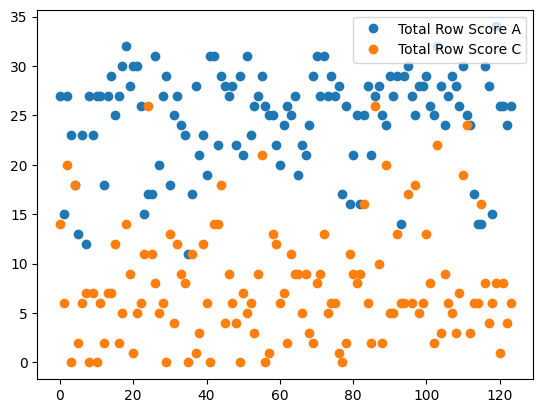

In [26]:
plt.plot(syn1['Total Row Score A'], "o", label="Total Row Score A")
plt.plot(syn1['Total Row Score C'], "o", label="Total Row Score C")
plt.legend( loc='upper right')


In [ ]:
df_syn = pd.read_csv('synthetic_data.csv')

Output = df_syn.apply(pin_update, axis=1)
Output1 = df_syn.apply(pin_update1, axis=1)
#Output2 = df_syn.apply(pin_update2, axis=1)
df_syn['Output'] = Output
df_syn['Output1'] = Output1
#df_syn['Output2']  = Output2
df_syn
df1_syn = df_syn[["Anteroposterior 1",
          'Anteroposterior 2',
          'Vertical 1',
          'Vertical 2',
          'Transverse',
          'Crowding ',
          'Spacing',
          'Tooth shape/size\r\n',
          "Pan 2\r\n",
          'Total Row Score A',
          'Anteroposterior 1.1',
          'Anteroposterior',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding .2',
          'Spacing.1',
          'Tooth shape/size\r\n.1',
          'Pan 2\r\n.1',
          'Total Row Score B',
          'Output',
          'Output1']]

df1_syn.iloc[1:, :]

target_column = ["Output","Output1"]
numerical_column = df1_syn.columns.drop(target_column)
output_rows_syn = df1_syn[target_column]
df1_syn.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
scaler.fit(df1_syn)
df1_syn = scaler.transform(df1_syn)


X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(df1_syn, output_rows_syn, test_size=0.25,shuffle=True)
np.median(df_syn['Total Row Score C'])